<a href="https://colab.research.google.com/github/i-Legacy/PDI/blob/master/PrimeraEntrega%2BDiYelsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final - Facundo Nahuel Di Yelsi**

El dataset escogido consiste en una base de datos formada por un catálogo de automóviles usados. Los objetivos serán decubrir una serie de patrones que permitan conocer a profundidad el dataset elegido (tomado de Kaggle), con el fin de lograr que el dueño del catálogo potencie sus ventas, haciendo hincapié en los vehículos que puedan considerarse problemáticos para su venta y de esta forma enfocarse en disminuír perdidas de dinero y aumentar así sus ganancias. Para esto, se desarrollan algunas preguntas de interés, seguido a una descripción más detallada de los objetivos.

#**Preguntas de interés**

1. Distribución de los datos y anomalías (Boxplot)
2. Correlación entre las variables (Mapa de calor con matriz de correlación)
3. Relación entre el precio y el año de fabricación del vehículo (Dispersión)
4. Relación entre el precio y la cantidad de días en los que estuvo listado (es decir, que no fue comprado) (Dispersión)
5. Relación entre el kilometraje y el precio (Dispersión)
6. Relación entre el kilometraje y el año de fabricación (Dispersión)
7. Relación entre la cantidad de veces que sube de precio y el tiempo en el catálogo (Dispersión)

#¿Cómo podrían evitarse pérdidas de dinero en base a los autos disponibles en el catálogo?

**Abstracto:**
En este caso se evaluarán las características de los vehículos del catálogo con el fin de evitar el hecho de tener automóviles sin vender durante mucho tiempo para evitar así pérdidas de dinero y aumentar las ganancias y circulación más rápida del mismo.

**Definición del objetivo**: a través de la elaboración de un análisis exploratorio de datos en el qué se elaboran diferentes gráficos y procesamientos en la información adquirida se buscará identificar distintas carácterísticas sobre los vehículos con los que se cuenta en el catálogo. Se intentará localizar por qué ciertos automóviles permanecen mucho tiempo en el mismo y las posibles causas de este inconveniente.

**Contexto comercial**: la identificación de vehículos que permanecen mucho tiempo sin venderse permitirá al dueño de los automóviles tomar decisiones que pueden impactar a nivel comercial. La localización de parámetros que dificulten las ventas podría ayudar a elaborar conclusiones que puedan evitar pérdidas de dinero a futuro, por ejemplo, evitando la compra de unidades que cumplan con alguna de estas características observadas.

**Problema comercial**: en esta instancia se elaboran preguntas que buscan solucionar el problema mencionado anteriormente. Algunas de las preguntas podrían ser:

1. ¿Cuántos autos permanecen en el catálogo más de un año?
2. ¿Existe alguna marca o modelo de automóvil que sea dificil de vender?
3. ¿Puede tener que ver esto con el kilometraje de los vehículos?
4. ¿Es el color de los mismos algo fundamental? 
5. ¿Impacta en algo la cantidad de fotografías tomadas a los vehículos?
6. ¿Son estos automóviles caros?
7. ¿Tiene relevancia la antiguedad de los mismos?


**Contexto analítico**: se cuenta con un archivo CSV (*cars.csv*) que contiene una gran cantidad de información acerca de los vehículos listados en el catálogo. Algunas de las carácteristicas son: marca, modelo, color, año de producción, precio en USD, kilometraje, tipo de motor, cantidad de fotos tomadas, cantidad de veces que subió su precio y la cantidad de días que lleva listado en el catálogo

#**Extracción de los datos:**

In [72]:
import pandas as pd

In [73]:
import numpy as np

In [74]:
from google.colab import drive
import os

In [75]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [76]:
df = pd.read_csv('/content/gdrive/MyDrive/cars.csv')

In [77]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [78]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [79]:
import matplotlib as mpl

In [80]:
import matplotlib.pyplot as plt

In [81]:
import matplotlib.dates as mdates

In [82]:
import seaborn as sns

In [83]:
from scipy import stats

#**Análisis exploratorio de los datos**:

#**Respuesta a las primeras preguntas de interés**

##1. Distribución de los datos y anomalías (Boxplot)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

Text(0.5, 0, 'Días transcurridos desde la publicación')

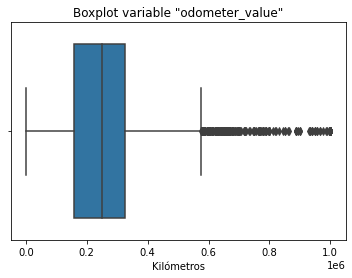

<Figure size 432x288 with 0 Axes>

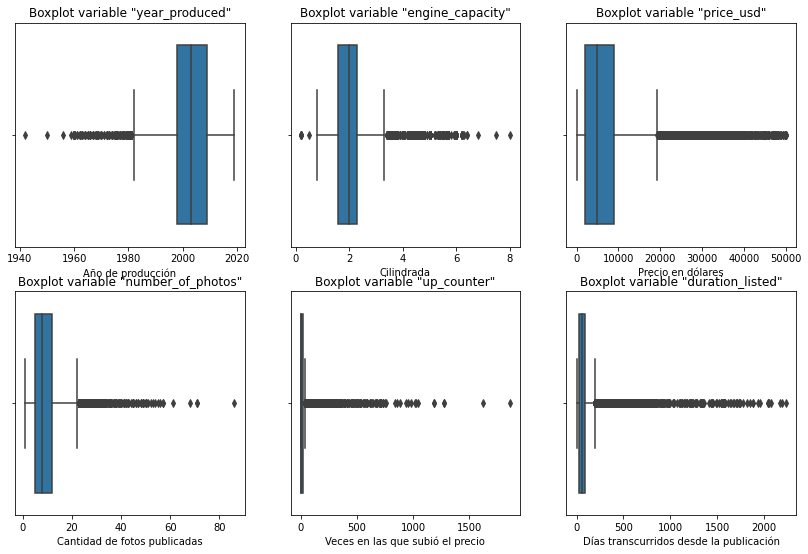

In [84]:
#Grafico 1 variable
plt.figure(1)
sns.boxplot(df['odometer_value'])
plt.title('Boxplot variable "odometer_value"')
plt.xlabel('Kilómetros')

#Grafico 6 variables
plt.figure(2)
plt.figure(figsize=(14,14))

plt.subplot(331)
sns.boxplot(df['year_produced'])
plt.title('Boxplot variable "year_produced"')
plt.xlabel('Año de producción')

plt.subplot(332)
sns.boxplot(df['engine_capacity'])
plt.title('Boxplot variable "engine_capacity"')
plt.xlabel('Cilindrada')

plt.subplot(333)
sns.boxplot(df['price_usd'])
plt.title('Boxplot variable "price_usd"')
plt.xlabel('Precio en dólares')

plt.subplot(334)
sns.boxplot(df['number_of_photos'])
plt.title('Boxplot variable "number_of_photos"')
plt.xlabel('Cantidad de fotos publicadas')

plt.subplot(335)
sns.boxplot(df['up_counter'])
plt.title('Boxplot variable "up_counter"')
plt.xlabel('Veces en las que subió el precio')

plt.subplot(336)
sns.boxplot(df['duration_listed'])
plt.title('Boxplot variable "duration_listed"')
plt.xlabel('Días transcurridos desde la publicación')


**Conclusiones**:

Estas se basan en la matriz obtenida al realizar un describe y los boxplots graficados anteriormente.

**a.** *Odometer_value*: La mayoría de valores, es decir los que se encuentran dentro de la caja y están delimitados por el primer y tercer cuartil (25 y 75% respectivamente) están entre 128.000 y 325.000 Km recorridos. Aproximándose a los 600.000 Km se encuentra la barrera que deja fuera a los 'outliers' los cuales albergan valores de hasta 1.000.000 como valor máximo. El mínimo es 0, es decir que se trataría de un auto nuevo.

**b**. *Year_produced*: La media es de 2002.94, donde al aproximar ya que no es correcto considerar al año como un valor decimal, encontraríamos que el año es 2003. Por los valores que encierra el boxplot se tiene que la mayoría de los vehiculos fueron producidos entre el año 1998 y 2009. El auto más nuevo a la venta es del año 2019 y el más antiguo del 1942.

**c.** *Engine_capacity*: La media es prácticamente 2.0 y la mayor parte se encuentra en el rango entre 1.6 y 2.3. Existen casos particulares como los de los extremos donde debería verificarse de que vehiculo se trata (0.2 y 8.0).

**d**. *Price_usd*: El valor promedio de los vehiculos listados es de 6639.97 USD. La mayoría de los automóviles se encuentran entre 2100 y 8990 USD. El más caro de la lista tiene un costo de 50.000 dólares y se han cargado en la base de datos 5 vehículos con un valor de 1 dólar, por lo que debería revisarse que sucedió en esos casos.

**e**. *Number_of_photos*: La cantidad media de fotos realizadas y publicadas a cada vehículo es de 10 fotos (redondeando). La mayoría de las publicaciones presentan entre 5 y 12 fotografías. Un automóvil cuenta con 86 fotografías siendo este el valor máximo. El mínimo de fotos es 1.

**f**. *Up_counter*: Los valores que limitan la caja son 2 y 16 veces en las que se subió el precio. Según se indica un vehículo aumentó 1861 veces.

**g**. *Duration_listed*: El valor medio de días en los que los vehículos se encuentran en el catálogo es de casi 81 días, por lo que en menos de 3 meses desde que se publican es probable que los vehículos sean vendidos. La mayor cantidad de los autos se encuentra entre 23 y 91 días en el catálogo. El automóvil que más lleva publicado tiene 2232 días en venta (6 años, 1 mes y 10 días). Se tienen vehículos con 0 días, es decir, que fueron publicados el mismo día que se tomó la base de datos.




##2. Correlación entre todas las variables (Mapa de calor con matriz de correlación)

Filtro mi DF para quedarme con las columnas a analizar

In [85]:
l=[x for x in df.columns if x  in ['odometer_value','engine_capacity','year_produced','price_usd','number_of_photos','up_counter','duration_listed']] #Filtro volumen y simbolo
datos=df[l] #Meto ese filtro en el df y lo paso a datos para tener el nuevo

datos.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
1,290000,2002,3.0,5000.00,12,54,83
2,402000,2001,2.5,2800.00,4,72,151
3,10000,1999,3.0,9999.00,9,42,86
4,280000,2001,2.5,2134.11,14,7,7


Armo mi matriz de correlación

In [86]:
#Matriz de correlación
datos.corr()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
odometer_value,1.000000,-0.488679,0.105704,-0.421204,-0.143708,-0.020961,-0.000428
year_produced,-0.488679,1.000000,0.005059,0.705511,0.258180,0.007945,-0.017001
engine_capacity,0.105704,0.005059,1.000000,0.296597,0.106691,0.079152,0.080081
price_usd,-0.421204,0.705511,0.296597,1.000000,0.316859,0.057382,0.033524
number_of_photos,-0.143708,0.258180,0.106691,0.316859,1.000000,0.073891,-0.028255
up_counter,-0.020961,0.007945,0.079152,0.057382,0.073891,1.000000,0.698116
duration_listed,-0.000428,-0.017001,0.080081,0.033524,-0.028255,0.698116,1.000000


Mapa de calor

Text(0.5, 1.0, 'Mapa de calor de matriz de correlación')

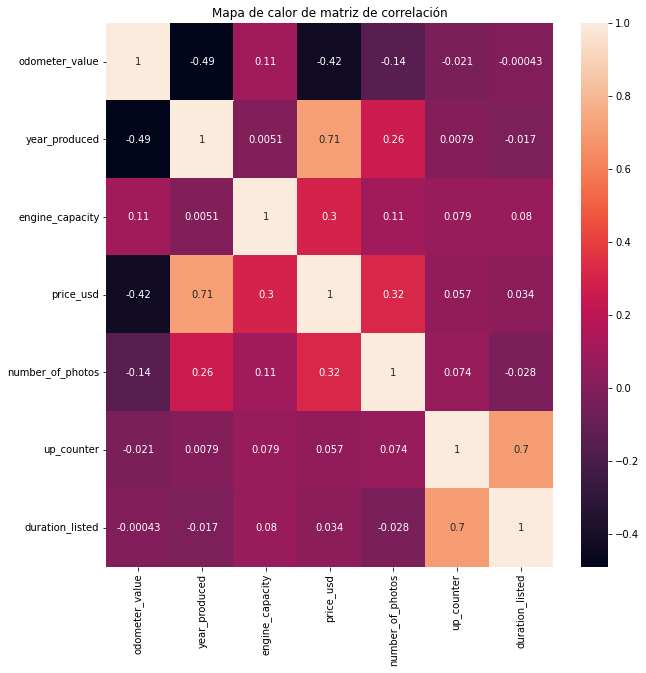

In [87]:
#Mapa de calor realizado sobre la matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(data=datos.corr(),annot = True)
plt.title('Mapa de calor de matriz de correlación')

**Conclusiones**:

Los colores más claros indican una correlación positiva, mientras que los oscuros denotan una correlación negativa. Además se visualizan los valores de la matriz de correlación.

*1.* Existe una correlación negativa entre las variables 'odometer_value' y 'year_produced' (-0.488679). Esto se puede interpretar como que al tener autos de mayor kilometraje los años suelen tener un valor menor, es decir, ser más antiguos.

*2.* También existe una correlación negativa entre 'odometer_value' y 'price_usd' (-0.421204), por lo que al tener mayor kilometraje los precios de los vehículos deberían disminuir.

*3.* Entre las variables 'year_produced' y 'price_usd' se tiene una correlación de (0.705511). Claramente a medida que el vehículo es más nuevo su valor se incrementa.

*4.* Al observar las variables 'duration_listed' y 'up_counter' se puede concluir que los vehículos que más tiempo permanecen en el catálogo son los que más veces sufrieron modificaciones o aumentos en su precio (0.698116).

*5.* También podría ser interesante analizar la relación entre 'price_usd' y 'engine_capacity' (0.296597) para observar si al subir el cilindraje aumenta el precio, así como la relación entre el número de fotos y el precio (0.316859), que indicaría que autos más caros tienen más fotos publicadas o finalmente el número de fotos y el año de fabricación del auto (0.258180), para evaluar si los autos más nuevos son los que cuentan con más fotografías en el catálogo.

##3. Relación entre el precio y el año de fabricación del vehiculo (Dispersión)

Text(0.5, 1.0, 'Dispersión "price_usd" vs "year_produced"')

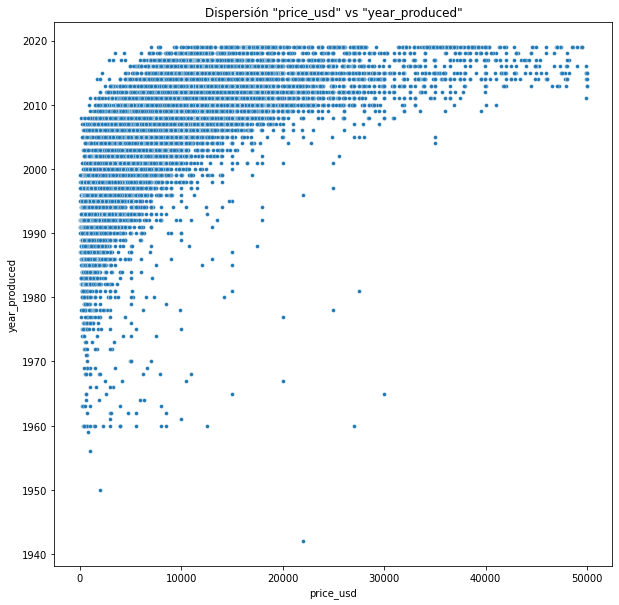

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd',y='year_produced',data=datos, s=15)
plt.title('Dispersión "price_usd" vs "year_produced"')

**Conclusiones**:

Al observar el precio de los vehículos más caros puede verse que estos son mayormente producidos en los últimos años. Esto no es algo exclusivo, ya que también existen autos nuevos con precios bajos. Normalmente, la mayoría de los vehículos antiguos presenta precios bajos.

##4. Relación entre el precio y el la cantidad de días en los que estuvo listado (es decir, que no fue comprado) (Dispersión)

Text(0.5, 1.0, 'Dispersión "price_usd" vs "duration_listed"')

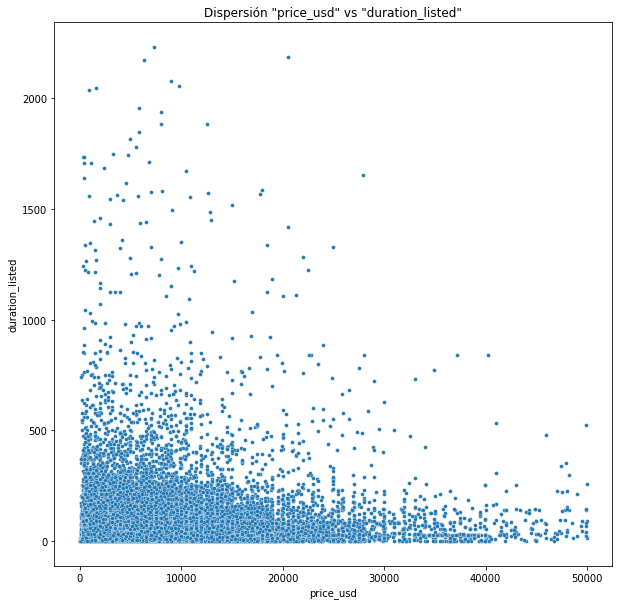

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd',y='duration_listed',data=datos, s=15)
plt.title('Dispersión "price_usd" vs "duration_listed"')

**Conclusiones**:

Si bien no existe una relación clara entre estas 2 variables ya que, por ejemplo, se tienen muchos autos hace pocos días en el catálogo, sin importar su precio, puede verse como los autos que permanecen muchos días tienen precios bajos (zona superior izquierda). Debería analizarse que sucede en estos casos con los dueños del catálogo, ya que quizás son autos que por algún motivo la gente no quiere y en base a eso se publican a menor precio.

##5. Relación entre el kilometraje y el precio (Dispersión)

Text(0.5, 1.0, 'Dispersión "price_usd" vs "odometer_value"')

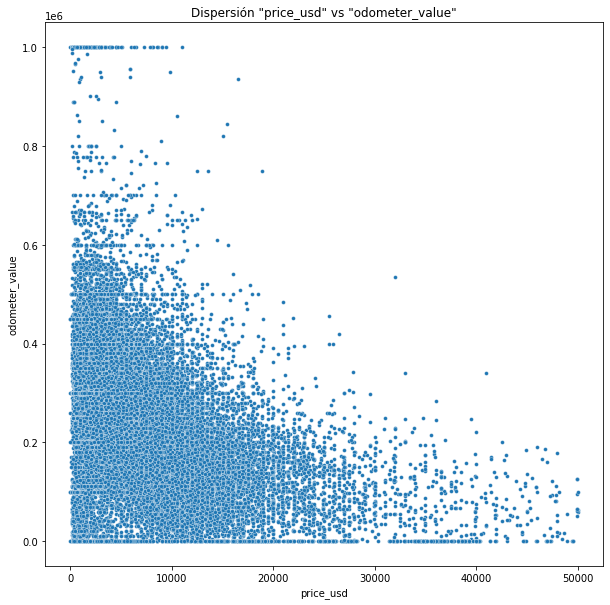

In [90]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd',y='odometer_value',data=datos, s=15)
plt.title('Dispersión "price_usd" vs "odometer_value"')

**Conclusiones**:

Aquí puede verse que los vehículos de mayor precio suelen tener menor kilometraje, así como los automóviles que tienen más kilómetros realizados se distribuyen en el gráfico en zonas de precios bajos. Lógicamente también existen autos con precios bajos y poco kilometraje, representando estos puntos probablemente a autos de entrada de gama o con pocas prestaciones.

##6. Relación entre el kilometraje y el año de fabricación (Dispersión)

Text(0.5, 1.0, 'Dispersión "odometer_value" vs "year_produced"')

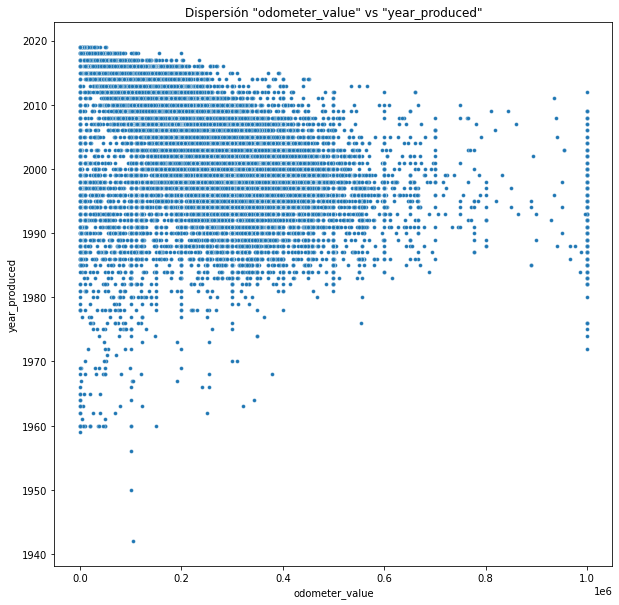

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='odometer_value',y='year_produced',data=datos, s=15)
plt.title('Dispersión "odometer_value" vs "year_produced"')

**Conclusiones**:

Podría analizarse que, si bien los datos que relacionan el kilometraje y el año de fabricación se encuentran bastante distribuidos, los autos con más kilómetros recorridos suelen ser más antiguos (observar la gran nube donde se acumula la mayoría de la información). Existen casos particulares que deberían evaluarse con mayor detalle, como los autos muy antiguos con poco kilometraje (quizás autos de colección) y los autos muy nuevos con mucho kilometraje.

##7. Relación entre la cantidad de veces que sube de precio y el tiempo en el catálogo (Dispersión)

Text(0.5, 1.0, 'Dispersión "duration_listed" vs "up_counter"')

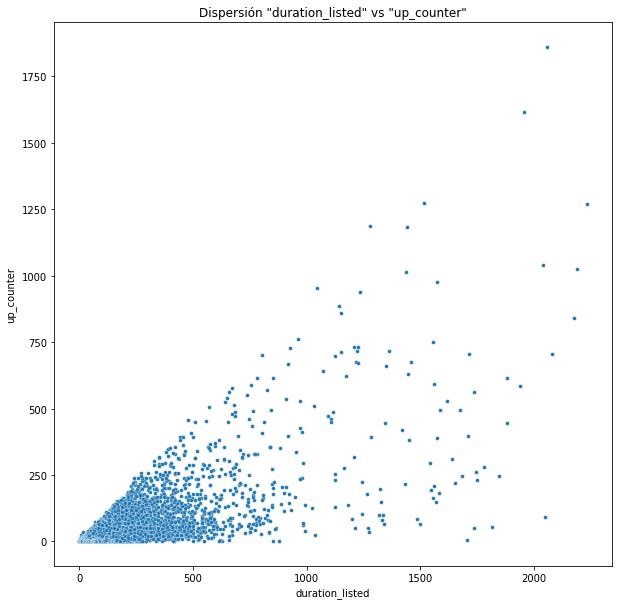

In [92]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='duration_listed',y='up_counter',data=datos, s=15)
plt.title('Dispersión "duration_listed" vs "up_counter"')

**Conclusiones**:

Es posible observar como a medida que el vehículo pasa más tiempo listado en el catálogo, la cantidad de veces que su precio se ve modificado se incrementa. Existen casos también donde el automóvil estuvo mucho tiempo publicado y sin embargo su valor no se modificó en muchas ocasiones (puntos zona inferior derecha). La mayoría de los puntos se concentra en la parte izquierda (lo que significaría que salen rápidamente del catálogo). De estos, muchos modifican su precio en varias ocasiones, mientras que otros lo mantienen constante (valor 0 en up_counter)

#Respuesta a la pregunta sobre las pérdidas de dinero

Previo a resolver este inconveniente se recuerdan las preguntas planteadas en el problema comercial:

**Problema comercial**: en esta instancia se elaboran preguntas que buscan solucionar el problema mencionado anteriormente. Algunas de las preguntas podrían ser:

1. ¿Cuántos autos permanecen en el catálogo más de un año?
2. ¿Existe alguna marca o modelo de automóvil que sea dificil de vender?
3. ¿Puede tener que ver esto con el kilometraje de los vehículos?
4. ¿Es el color de los mismos algo fundamental? 
5. ¿Impacta en algo la cantidad de fotografías tomadas a los vehículos?
6. ¿Son estos automóviles caros?
7. ¿Tiene relevancia la antiguedad de los mismos?


In [93]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


##1. ¿Cuántos autos permanecen en el catálogo más de un año?

(0.0, 2300.0)

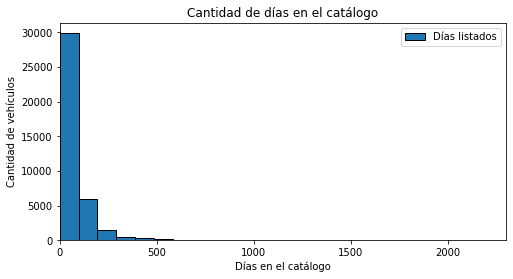

In [94]:
plt.figure(figsize=(8,4))
plt.hist(df.duration_listed,edgecolor = 'black', label = ['Días listados'],bins = 23)
plt.xlabel('Días en el catálogo')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de días en el catálogo')
plt.legend(loc='upper right')
#plt.xticks(range(0,105,10))
plt.xlim(0,2300)

Aquí puede observarse que la gran mayoría de los vehículos están poco tiempo listados. La media de días es de 80, por lo que generalmente los autos salen del catálogo antes de los 3 meses. 

Para contestar las siguientes consultas se considerará como **vehículo difícil de vender** a aquellos que permanezcan *más de un año* en el catálogo.

In [95]:
df_dificiles = df[df['duration_listed'] >= 365]
df_dificiles.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
16,Subaru,Outback,automatic,other,318650,2005,gasoline,False,gasoline,3.0,...,True,False,True,True,True,False,False,True,True,468
28,Subaru,Impreza,mechanical,black,300000,1999,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,581
42,Subaru,Tribeca,automatic,grey,225000,2005,gas,True,gasoline,3.0,...,False,True,False,True,True,False,False,True,True,419
71,Subaru,Impreza,mechanical,red,363500,1994,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,370
105,Subaru,Forester,automatic,black,233000,2000,gasoline,False,gasoline,2.0,...,True,False,False,True,True,False,False,True,True,520


In [96]:
df_dificiles.shape

(811, 30)

La cantidad de vehículos que supera los 365 días en el catálogo es de 811.

(365.0, 2300.0)

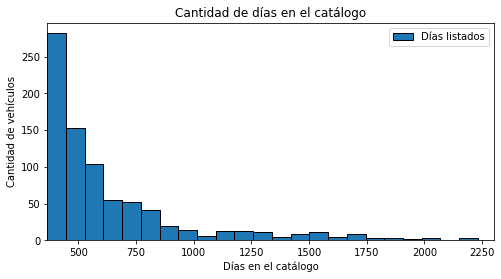

In [97]:
plt.figure(figsize=(8,4))
plt.hist(df_dificiles.duration_listed,edgecolor = 'black', label = ['Días listados'],bins = 23)
plt.xlabel('Días en el catálogo')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de días en el catálogo')
plt.legend(loc='upper right')
#plt.xticks(range(0,105,10))
plt.xlim(365,2300)

A su vez, puede verse como, de los que superan el año en el catálogo, la mayor cantidad se encuentra en la primera parte, y cómo a partir de los 2 años (730 días) la cantidad de vehículos en cada franja es generalmente menor a 50.

## 2. ¿Existe alguna marca o modelo de automóvil que sea dificil de vender?

Text(0.5, 0, 'Marca')

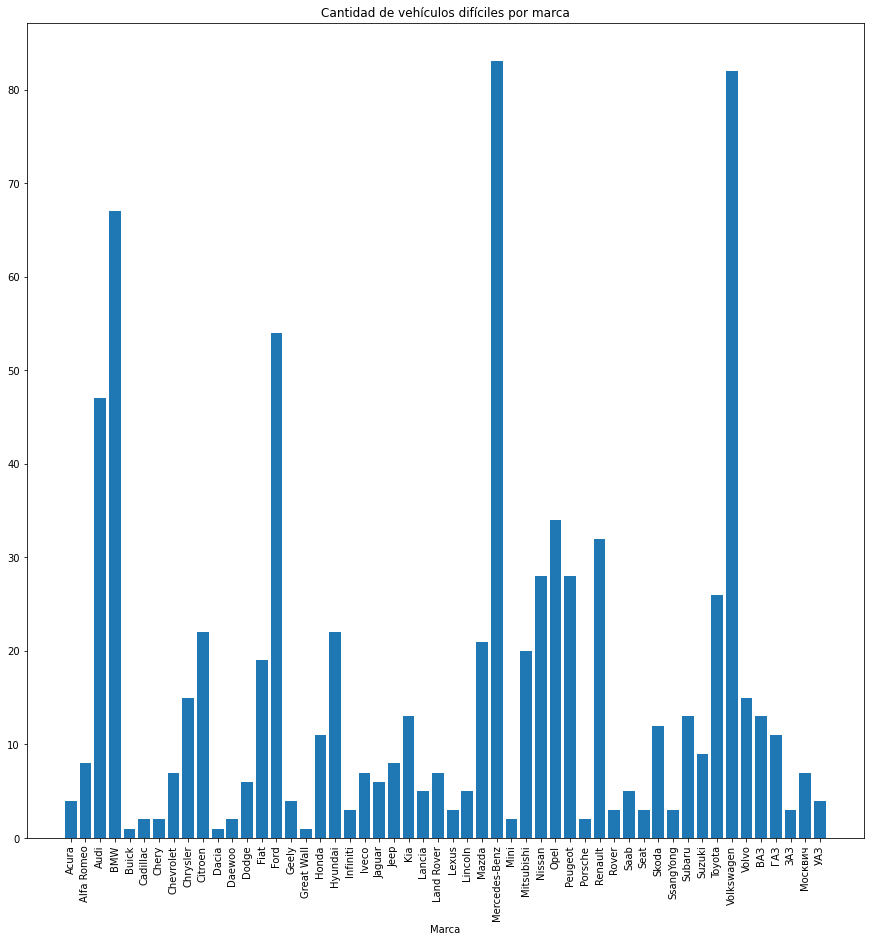

In [98]:
df_marcas = df_dificiles.groupby('manufacturer_name').size()
df_marcas
plt.figure(figsize=(15,15))
plt.bar(df_marcas.index,df_marcas.values)
plt.tick_params(axis='x', rotation=90)

plt.title('Cantidad de vehículos difíciles por marca')
plt.xlabel('Marca')

In [99]:
df_marcas.sort_values(ascending = False)

manufacturer_name
Mercedes-Benz    83
Volkswagen       82
BMW              67
Ford             54
Audi             47
Opel             34
Renault          32
Peugeot          28
Nissan           28
Toyota           26
Hyundai          22
Citroen          22
Mazda            21
Mitsubishi       20
Fiat             19
Volvo            15
Chrysler         15
Subaru           13
ВАЗ              13
Kia              13
Skoda            12
Honda            11
ГАЗ              11
Suzuki            9
Jeep              8
Alfa Romeo        8
Iveco             7
Chevrolet         7
Land Rover        7
Москвич           7
Jaguar            6
Dodge             6
Saab              5
Lincoln           5
Lancia            5
Acura             4
УАЗ               4
Geely             4
Rover             3
Seat              3
SsangYong         3
Infiniti          3
ЗАЗ               3
Lexus             3
Porsche           2
Mini              2
Daewoo            2
Chery             2
Cadillac          2
Gr

Puede observarse a través del gráfico de barras y de la lista anterior que las 5 marcas con mayor cantidad de vehículos sin vender por mucho tiempo son Audi, Ford, BMW, Volkswagen y Mercedes-Benz.

De aquí puede analizarse la cantidad de vehículos totales de cada una de estas 5 marcas, para ver si estos ocupan un gran porcentaje y, por lo tanto, son difíciles de vender, o simplemente se cuentan con muchos sin vender porque también la cantidad total es grande.

In [100]:
df_5marcas = df[df.manufacturer_name.isin(['Audi','Ford','BMW','Volkswagen','Mercedes-Benz'])]
df_5marcas

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
9478,Ford,Fiesta,mechanical,silver,294000,2004,diesel,False,diesel,1.4,...,False,False,False,False,False,False,False,False,False,5
9479,Ford,Escape,automatic,white,95000,2017,gasoline,False,gasoline,1.5,...,False,False,True,True,True,True,True,True,True,9
9480,Ford,Mondeo,mechanical,blue,123456,1997,diesel,False,diesel,1.8,...,False,False,False,False,False,False,False,False,False,0
9481,Ford,Focus,mechanical,black,250000,2008,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,True,False,True,15
9482,Ford,Escape,automatic,other,65000,2015,gasoline,False,gasoline,1.6,...,True,False,False,True,True,True,True,True,True,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,Mercedes-Benz,Vito,mechanical,white,290000,2006,diesel,False,diesel,2.2,...,False,False,False,False,False,False,False,False,False,96
36208,Mercedes-Benz,C180,mechanical,other,367000,1994,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,False,False,138
36209,Mercedes-Benz,Vario,mechanical,brown,620000,2000,diesel,False,diesel,2.9,...,False,False,False,False,False,False,False,False,False,117
36210,Mercedes-Benz,E260,automatic,white,250000,1987,gasoline,False,gasoline,2.6,...,False,False,False,False,False,False,False,False,False,119


Inicialmente puede verse que estas 5 marcas presentan 14.124 vehículos, es decir un 36,65% del total (385.31), lo cual representa un gran porcentaje considerando la cantidad de marcas disponibles.

In [101]:
df_5marcas_total = df_5marcas.groupby('manufacturer_name').size()
df_5marcas_total

manufacturer_name
Audi             2468
BMW              2610
Ford             2566
Mercedes-Benz    2237
Volkswagen       4243
dtype: int64

Esto significa que el porcentaje de autos difíciles de vender en cada marca es de:

*Audi*: 1,90%

*Volkswagen*: 1,93%

*Ford*: 2,10%

*BMW*: 2,56%

*Mercedes-Benz*: 3,71%

In [102]:
df.groupby('manufacturer_name').size().sort_values(ascending = False)

manufacturer_name
Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia         

Armo un dataframe con esta info (total y cantidad de dificiles)

In [103]:
marcas_total = df.groupby('manufacturer_name').size()
marcas_total.size

55

In [104]:
marcas_dificiles = df_dificiles.groupby('manufacturer_name').size()
marcas_dificiles.size

52

In [105]:
junto = pd.DataFrame(marcas_total)
junto.columns = ['Totales']
junto['Dificiles'] = marcas_dificiles
junto.fillna(0)

junto['Porcentaje'] = (junto['Dificiles'] / junto['Totales']) *100
junto
junto.fillna(0)
junto.sort_values('Porcentaje',ascending = False)

,Totales,Dificiles,Porcentaje
manufacturer_name,,,
Lincoln,36,5.0,13.888889
Москвич,55,7.0,12.727273
Jaguar,53,6.0,11.320755
Jeep,107,8.0,7.476636
ЗАЗ,42,3.0,7.142857
Acura,66,4.0,6.060606
Geely,71,4.0,5.633803
ГАЗ,200,11.0,5.500000
Lancia,92,5.0,5.434783


Text(0, 0.5, 'Porcentaje')

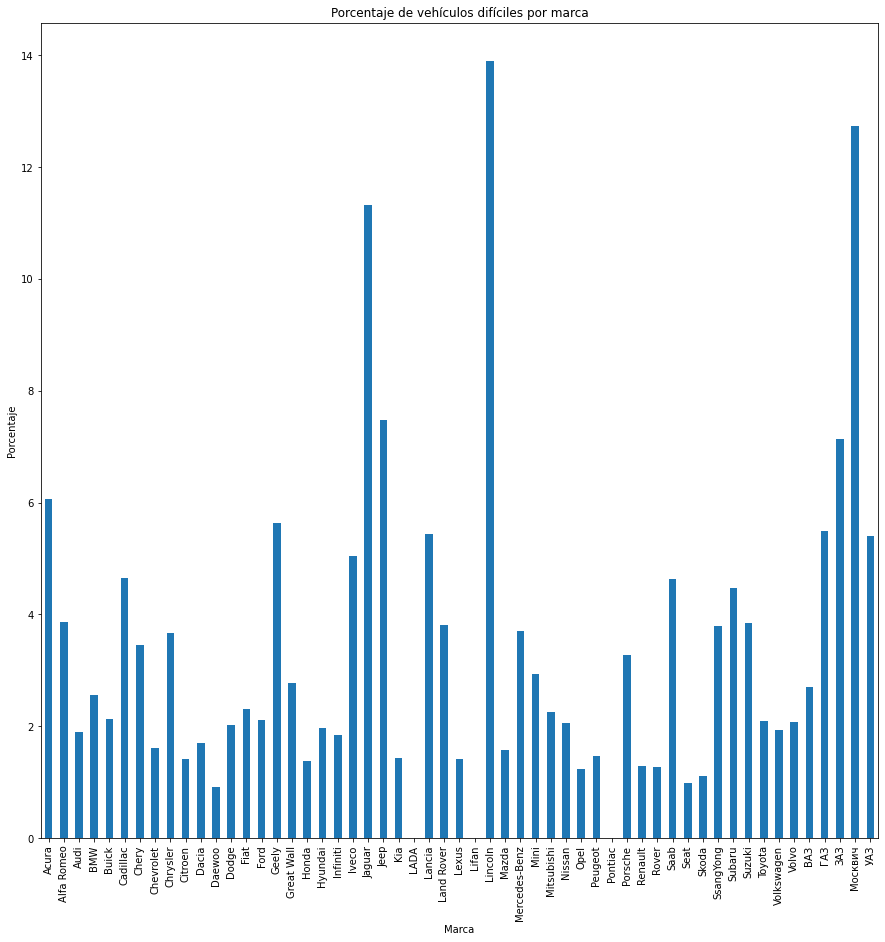

In [106]:
plt.figure(figsize=(15,15))
junto['Porcentaje'].plot.bar()

plt.title('Porcentaje de vehículos difíciles por marca')
plt.xlabel('Marca')
plt.ylabel('Porcentaje')

Aquí entonces se aprecia un resultado totalmente diferente al anterior, ya que puede verse como las marcas con mayor porcentaje de vehículos dificiles en la cantidad de automóviles totales del fabricante son 3A3, Jeep, Jaguar, Москвич y Lincoln, por lo que quizás sería recomendable observar el motivo por el que esos vehículos tienen ese porcentaje de no vendidos y si es mejor adquirir otras marcas en lugar de estas.

## 3. ¿Puede tener que ver esto con el kilometraje de los vehículos?

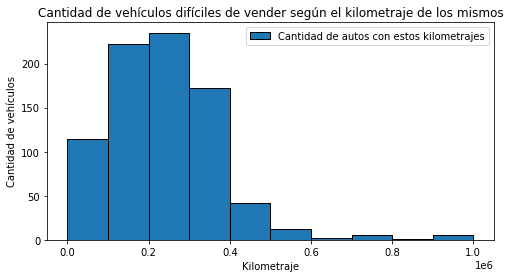

In [107]:
plt.figure(figsize=(8,4))
plt.hist(df_dificiles.odometer_value,edgecolor = 'black', label = ['Cantidad de autos con estos kilometrajes'],bins = 10)
plt.xlabel('Kilometraje')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos difíciles de vender según el kilometraje de los mismos')
plt.legend(loc='upper right')

Aquí puede verse que la mayoría de los vehículos difíciles de vender se encuentran entre los 200.000 y 300.000 km. También existe una gran cantidad de autos nuevos (0 km) sin ser vendidos. Puede observarse también como hay algunos autos que poseen un kilometraje mucho más alto, pero estos representan un porcentaje pequeño en el total de vehículos difíciles (principalmente porque el catálogo no cuenta con muchos de estos)

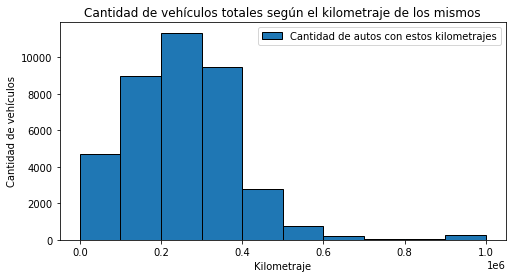

In [108]:
plt.figure(figsize=(8,4))
plt.hist(df.odometer_value,edgecolor = 'black', label = ['Cantidad de autos con estos kilometrajes'],bins = 10)
plt.xlabel('Kilometraje')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos totales según el kilometraje de los mismos')
plt.legend(loc='upper right')

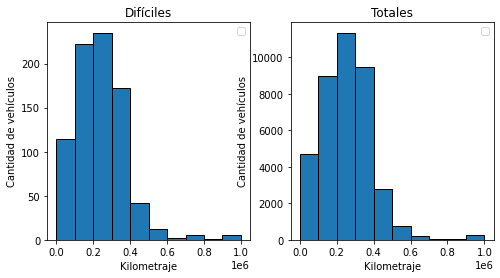

In [109]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(df_dificiles.odometer_value,edgecolor = 'black',bins = 10)
plt.xlabel('Kilometraje')
plt.ylabel('Cantidad de vehículos')
plt.title('Difíciles')
plt.legend(loc='upper right')

plt.subplot(122)
plt.hist(df.odometer_value,edgecolor = 'black',bins = 10)
plt.xlabel('Kilometraje')
plt.ylabel('Cantidad de vehículos')
plt.title('Totales')
plt.legend(loc='upper right')

Analizando la forma de los 2 histogramas (el que contempla a los autos difíciles de vender y al que contempla el total de los autos) puede verse que presentan apariencias o perfiles similares, teniendo la mayoría de los vehículos entre 200.000 y 300.000, por lo que a priori el kilometraje no sería un factor determinante en la venta o no venta de los vehículos.

## 4. ¿Es el color de los mismos algo fundamental? 

Text(0.5, 0, 'Color')

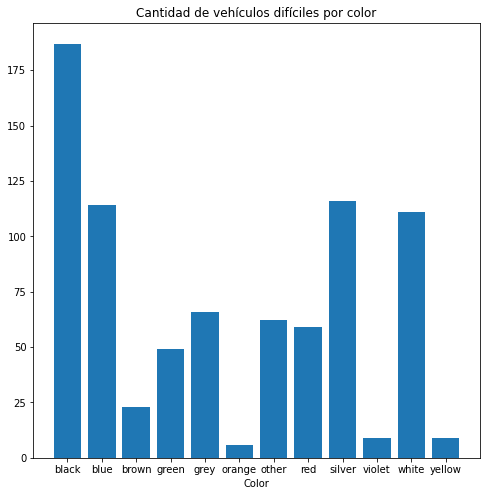

In [110]:
df_colores = df_dificiles.groupby('color').size()
df_colores
plt.figure(figsize=(8,8))
plt.bar(df_colores.index,df_colores.values)
plt.title('Cantidad de vehículos difíciles por color')
plt.xlabel('Color')

In [111]:
df_colores.sort_values(ascending = False)

color
black     187
silver    116
blue      114
white     111
grey       66
other      62
red        59
green      49
brown      23
violet      9
yellow      9
orange      6
dtype: int64

In [112]:
colores_total = df.groupby('color').size()
colores_total.size

12

In [113]:
colores_dificiles = df_dificiles.groupby('color').size()
colores_dificiles.size

12

In [114]:
juntocolor = pd.DataFrame(colores_total)
juntocolor.columns = ['Totales']
juntocolor['Dificiles'] = colores_dificiles


juntocolor['Porcentaje'] = (juntocolor['Dificiles'] / juntocolor['Totales']) *100
juntocolor
juntocolor.fillna(0)
juntocolor.sort_values('Porcentaje',ascending = False)

,Totales,Dificiles,Porcentaje
color,,,
orange,184,6,3.260870
yellow,303,9,2.970297
white,4212,111,2.635328
brown,886,23,2.595937
black,7705,187,2.426995
other,2688,62,2.306548
red,2925,59,2.017094
blue,5802,114,1.964840
violet,463,9,1.943844


Text(0, 0.5, 'Porcentaje')

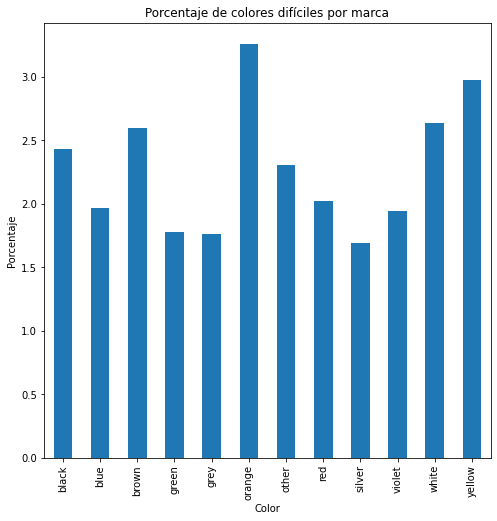

In [115]:
plt.figure(figsize=(8,8))
juntocolor['Porcentaje'].plot.bar()

plt.title('Porcentaje de colores difíciles por marca')
plt.xlabel('Color')
plt.ylabel('Porcentaje')

Aquí nuevamente sucede algo similar al caso de la marca. Al observar únicamente los vehículos difíciles la mayoría de los autos son de color negro, plateado y azul (siendo estos colores normales o comunmente usados por la mayoría de los usuarios de automóviles).

Cuando se analiza el porcentaje de colores en vehículos difíciles sobre el total se observa que el mayor porcentaje se lo lleva el color naranja, seguido por el amarillo y en tercer lugar el blanco. Si bien el blanco es un color muy frecuente en los automóviles, el naranja y el amarillo suelen ser más exóticos y quizás menos gente está dispuesta a adquirir un vehículo con estos colores.

De esta forma podría recomendarse al dueño del catálogo evitar vehículos naranjas o amarillos y priorizar en colores como el gris o el plateado.

## 5. ¿Impacta en algo la cantidad de fotografías tomadas a los vehículos?

(0.0, 86.0)

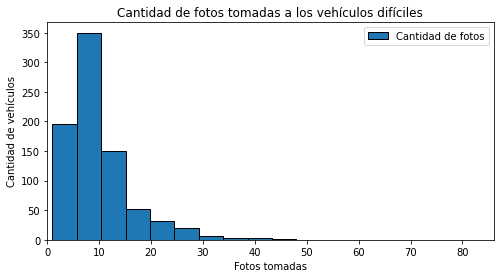

In [116]:
plt.figure(figsize=(8,4))
plt.hist(df_dificiles.number_of_photos, label = ['Cantidad de fotos'],edgecolor = 'black',bins = 10)
plt.xlabel('Fotos tomadas')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de fotos tomadas a los vehículos difíciles')
plt.legend(loc='upper right')
plt.xlim(0,86)

(0.0, 86.0)

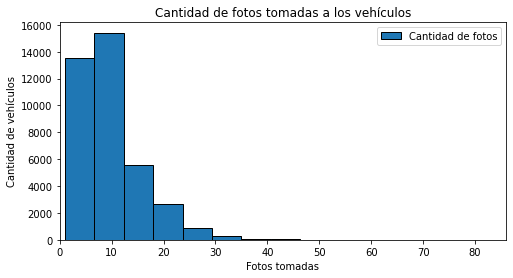

In [117]:
plt.figure(figsize=(8,4))
plt.hist(df.number_of_photos, label = ['Cantidad de fotos'],edgecolor = 'black', bins = 15)
plt.xlabel('Fotos tomadas')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de fotos tomadas a los vehículos')
plt.legend(loc='upper right')
plt.xlim(0,86)

(0.0, 86.0)

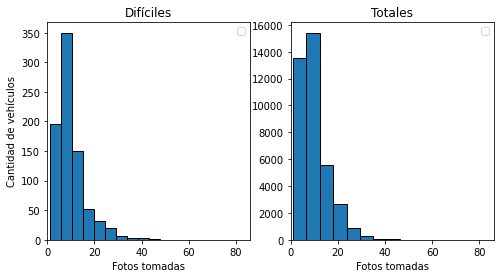

In [118]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(df_dificiles.number_of_photos,edgecolor = 'black',bins = 10)
plt.xlabel('Fotos tomadas')
plt.ylabel('Cantidad de vehículos')
plt.title('Difíciles')
plt.legend(loc='upper right')
plt.xlim(0,86)

plt.subplot(122)
plt.hist(df.number_of_photos,edgecolor = 'black',bins = 15)
plt.xlabel('Fotos tomadas')
#plt.ylabel('Cantidad de vehículos')
plt.title('Totales')
plt.legend(loc='upper right')
plt.xlim(0,86)

Comparando los dos histogramas parece que la cantidad de fotos no es algo influyente en la dificultad en vender el vehículo, ya que la gráfica de los difíciles es similar a la de los totales.

## 6. ¿Son estos automóviles caros?

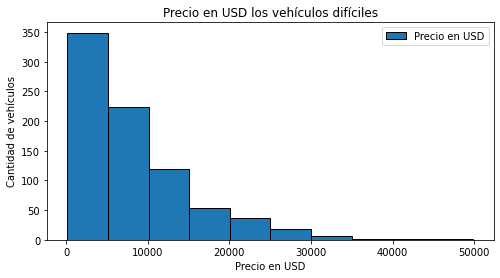

In [119]:
plt.figure(figsize=(8,4))
plt.hist(df_dificiles.price_usd, label = ['Precio en USD'],edgecolor = 'black',bins = 10)
plt.xlabel('Precio en USD')
plt.ylabel('Cantidad de vehículos')
plt.title('Precio en USD los vehículos difíciles')
plt.legend(loc='upper right')

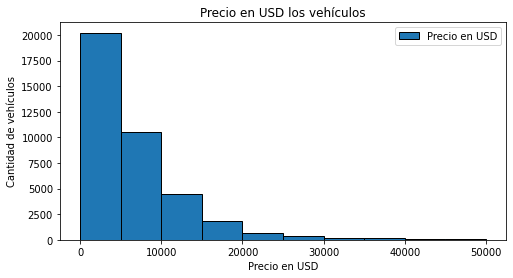

In [120]:
plt.figure(figsize=(8,4))
plt.hist(df.price_usd, label = ['Precio en USD'],edgecolor = 'black',bins = 10)
plt.xlabel('Precio en USD')
plt.ylabel('Cantidad de vehículos')
plt.title('Precio en USD los vehículos')
plt.legend(loc='upper right')

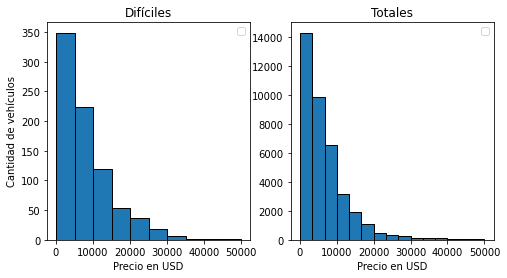

In [121]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(df_dificiles.price_usd,edgecolor = 'black',bins = 10)
plt.xlabel('Precio en USD')
plt.ylabel('Cantidad de vehículos')
plt.title('Difíciles')
plt.legend(loc='upper right')


plt.subplot(122)
plt.hist(df.price_usd,edgecolor = 'black',bins = 15)
plt.xlabel('Precio en USD')
#plt.ylabel('Cantidad de vehículos')
plt.title('Totales')
plt.legend(loc='upper right')


Los precios de los vehículos difíciles de vender no se diferencian de los vehículos que se venden sin problemas, por lo que no quiere decir que el precio sea algo que imposibilité la venta (al menos de forma general, por lo que podría evaluarse luego individualmente el caso de cada automóvil en particular en caso de querer conocer más sobre el mismo).

## 7. ¿Tiene relevancia la antiguedad de los mismos?

Text(0.5, 1.0, 'Cantidad de vehículos difíciles por año de fabricación')

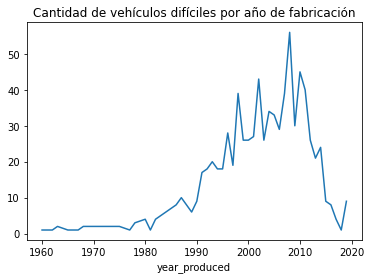

In [122]:
df_antiguedad = df_dificiles.groupby('year_produced').size()
df_antiguedad

df_antiguedad.plot.line()
plt.title('Cantidad de vehículos difíciles por año de fabricación')

Text(0.5, 1.0, 'Cantidad de vehículos por año de fabricación')

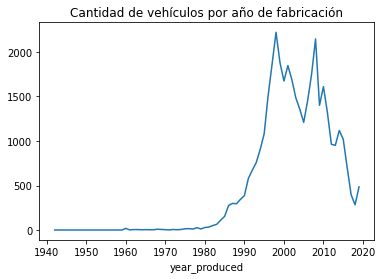

In [123]:
df_ant_total = df.groupby('year_produced').size()
df_ant_total.plot.line()
plt.title('Cantidad de vehículos por año de fabricación')

Text(0.5, 1.0, 'Totales')

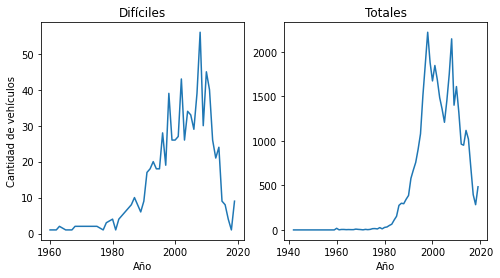

In [124]:
plt.figure(figsize=(8,4))

plt.subplot(121)
df_antiguedad.plot.line()
plt.xlabel('Año')
plt.ylabel('Cantidad de vehículos')
plt.title('Difíciles')

plt.subplot(122)
df_ant_total.plot.line()
plt.xlabel('Año')
plt.title('Totales')

In [125]:
juntoaño = pd.DataFrame(df_ant_total)
juntoaño.columns = ['Totales']
juntoaño['Dificiles'] = df_antiguedad


juntoaño['Porcentaje'] = (juntoaño['Dificiles'] / juntoaño['Totales']) *100
juntoaño
juntoaño.fillna(0)
juntoaño.sort_values('Porcentaje',ascending = False)

juntoaño.tail(60).sort_values('Porcentaje',ascending = False)

,Totales,Dificiles,Porcentaje
year_produced,,,
1961,2,1.0,50.000000
1963,6,2.0,33.333333
1967,4,1.0,25.000000
1965,5,1.0,20.000000
1968,10,2.0,20.000000
1962,6,1.0,16.666667
1980,29,4.0,13.793103
1975,15,2.0,13.333333
1978,27,3.0,11.111111


Al observar los gráficos primero puede verse la cantidad aproximada de vehículos por año, tanto en el grupo de los difíciles de vender así como en el total.

Al comparar para cada año la cantidad de vehículos considerados 'dificiles de vender' sobre el total de automóviles de ese año pueden verse los porcentajes que estos representan.

De esta forma puede apreciarse que los años con mayor porcentaje de vehículos sin vender son 1961, 1963, 1967, 1965 y 1968. De aquí puede concluirse que, si bien no se cuenta con una gran cantidad de autos para estos años, puede ser relativamente complejo hacer una venta de los mismos, por lo que debería priorizarse en lo posible la compra de automóviles más modernos.



#Otras visualizaciones de utilidad (Continuación del análisis exploratorio de los datos):

Estas visualizaciones permiten seguir conociendo y explorando los datos de una forma gráfica, lo que permite colaborar con la comprensión de la información procesada. Algunos de estos gráficos fueron realizados con la herramienta de MatPlotLib mientras que para otros se utilizó Seaborn

##**Gráfico 1**: Cantidad de vehículos por kilometraje, separados en automáticos y manuales

In [126]:
df['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [127]:
#Filtro y me quedo con los automáticos
df_aut = df[df.transmission == 'automatic']
df_aut.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67


In [128]:
#Filtro y me quedo con los manuales
df_mec = df[df.transmission == 'mechanical']
df_mec.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
10,Subaru,Forester,mechanical,other,280000,2003,gasoline,False,gasoline,2.0,...,True,False,True,False,True,False,True,True,True,11
12,Subaru,Forester,mechanical,other,321000,2002,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,2
13,Subaru,Justy,mechanical,red,49999,2001,gasoline,False,gasoline,1.3,...,False,False,False,False,False,False,False,False,False,230
17,Subaru,Impreza,mechanical,blue,191000,2005,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,21


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


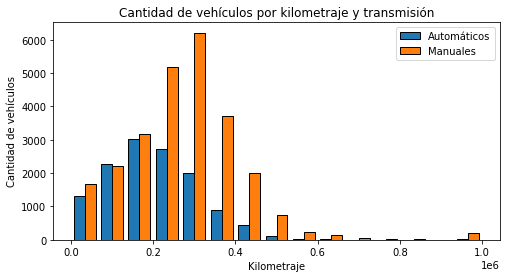

In [129]:
plt.figure(figsize=(8,4))
plt.hist([df_aut.odometer_value,df_mec.odometer_value],edgecolor = 'black', label = ['Automáticos','Manuales'],bins = 15)
plt.xlabel('Kilometraje')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos por kilometraje y transmisión')
plt.legend(loc='upper right')


El histograma propone colocar el kilometraje en el eje de abcisas y la cantidad de vehículos disponibles en el catálogo en el eje de ordenadas. Además, se realiza la separación entre automóviles automáticos (azul) y manuales (naranja).

Puede observarse como la mayoría de los vehículos son manuales, algo que se repite para los distintos kilometrajes, salvo para la franja de los 100.000 Km, donde los automáticos superan ligeramente a los manuales.

Además, a partir de los 200.000 Km la cantidad de vehículos manuales comienza a superar notoriamente a los automáticos.

In [130]:
df['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [131]:
df_antes2000 = df[df['year_produced'] < 2000]
df_antes2000['year_produced'].max()

1999

In [132]:
df_despues2000 = df[df['year_produced'] >= 2000]
df_despues2000['year_produced'].min()

2000

In [133]:
#Cantidad de autos a gasolina previos al 2000
cantidad_gasolina_pre = df_antes2000[df_antes2000.engine_type == 'gasoline']
gasolina_pre = cantidad_gasolina_pre['engine_fuel'].count()
gasolina_pre

10005

In [134]:
#Cantidad de autos a diesel previos al 2000
cantidad_diesel_pre = df_antes2000[df_antes2000.engine_type == 'diesel']
diesel_pre = cantidad_diesel_pre['engine_fuel'].count()
diesel_pre

3680

In [135]:
#Cantidad de autos electricos previos al 2000
cantidad_electric_pre = df_antes2000[df_antes2000.engine_type == 'electric']
electric_pre = cantidad_electric_pre['engine_fuel'].count()
electric_pre

0

In [136]:
#Cantidad de autos a gasolina desde el 2000 en adelante
cantidad_gasolina_post = df_despues2000[df_despues2000.engine_type == 'gasoline']
gasolina_post = cantidad_gasolina_post['engine_fuel'].count()
gasolina_post

15642

In [137]:
#Cantidad de autos a diesel desde el 2000 en adelante
cantidad_diesel_post = df_despues2000[df_despues2000.engine_type == 'diesel']
diesel_post = cantidad_diesel_post['engine_fuel'].count()
diesel_post

9194

In [138]:
#Cantidad de autos eléctricos desde el 2000 en adelante
cantidad_electric_post = df_despues2000[df_despues2000.engine_type == 'electric']
electric_post = cantidad_electric_post['engine_fuel'].count()
electric_post

10

In [139]:
#CREO UN DATAFRAME DONDE VEO CANTIDAD DE VEHÍCULOS PREVIOS Y POSTERIORES AL 2000, SEGUN EL TIPO DE COMBUSTIBLE
df_autos_combust = pd.DataFrame()
#Columnas
df_autos_combust['Previos al 2000'] = None
df_autos_combust['2000 en adelante'] = None
#Filas
df_autos_combust.loc['Gasolina'] = [gasolina_pre, gasolina_post]
df_autos_combust.loc['Diesel'] = [diesel_pre, diesel_post]
df_autos_combust.loc['Electricos'] = [electric_pre, electric_post]

df_autos_combust

,Previos al 2000,2000 en adelante
Gasolina,10005,15642
Diesel,3680,9194
Electricos,0,10


In [140]:
gasolina_cantidad = df_autos_combust.T['Gasolina'] 
gasolina_cantidad

Previos al 2000     10005
2000 en adelante    15642
Name: Gasolina, dtype: object

In [141]:
diesel_cantidad = df_autos_combust.T['Diesel'] 
diesel_cantidad

Previos al 2000     3680
2000 en adelante    9194
Name: Diesel, dtype: object

In [142]:
electric_cantidad = df_autos_combust.T['Electricos'] 
electric_cantidad

Previos al 2000      0
2000 en adelante    10
Name: Electricos, dtype: object

##**Gráfico 2**: Cantidad de vehículos fabricados antes y después del año 2000, describiendo el tipo de combustible que utilizan

Text(0.5, 1.0, 'Cantidad de vehículos previos y posteriores al 2000, separados por su tipo de combustible')

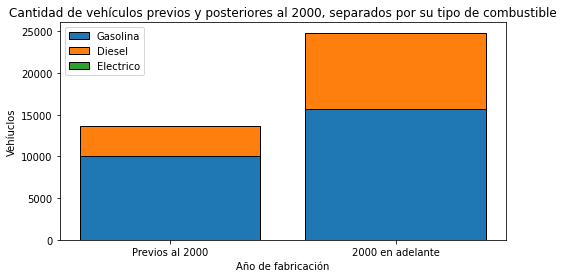

In [143]:
plt.subplots(figsize=(8,4))
plt.bar(df_autos_combust.columns,gasolina_cantidad,label = 'Gasolina', edgecolor = 'black')
plt.bar(df_autos_combust.columns,diesel_cantidad,label = 'Diesel', bottom=np.array(gasolina_cantidad), edgecolor = 'black')
plt.bar(df_autos_combust.columns,electric_cantidad,label = 'Electrico', bottom=np.array(gasolina_cantidad,diesel_cantidad), edgecolor = 'black')
plt.legend()

plt.xlabel('Año de fabricación')
plt.ylabel('Vehíuclos')
plt.title('Cantidad de vehículos previos y posteriores al 2000, separados por su tipo de combustible')

En el eje horizontal se encuentran la separación entre vehículos fabricados previo al año 2000, y los que se hicieron del 2000 en adelante. A su vez, se realiza la división entre el tipo de combustible.

Puede verse inicialmente que la mayoría de los vehículos del catálogo son fabricados del año 2000 en adelante, con una gran mayoría de vehículos con motor a gasolina. Previo al 2000 no se fabricó ningún auto eléctrico, y del 2000 en adelante solo 10 vehículos cumplen con esta condición, por lo que prácticamente no puede visualizarse en la gráfica.

Si bien la cantidad de vehículos aumento en general, puede verse como la proporción de autos con diesel aumentó en los vehículos del 2000 en adelante respecto a la otra categoría.

In [144]:
autos_por_año = df['year_produced'].value_counts()
autos_por_año = autos_por_año.sort_index()
autos_por_año

1942       1
1950       1
1956       1
1959       1
1960      19
        ... 
2015    1020
2016     702
2017     396
2018     284
2019     485
Name: year_produced, Length: 64, dtype: int64

##**Gráfico 3**: Cantidad de vehículos por año

(1942.0, 2019.0)

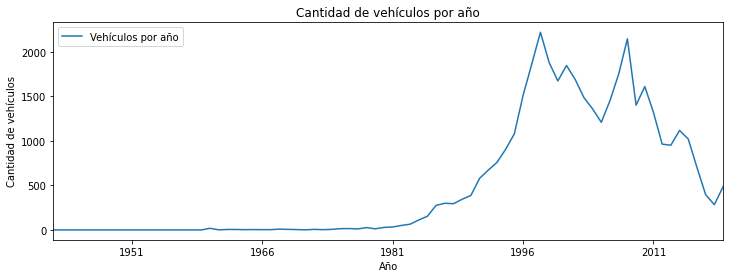

In [145]:
fig, ax = plt.subplots(figsize=(12, 4)) 
ax.plot(autos_por_año.index, autos_por_año.values, label='Vehículos por año')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad de vehículos')
ax.set_title('Cantidad de vehículos por año')
ax.legend(loc = 'upper left')
plt.xticks(np.arange(min(autos_por_año), max(autos_por_año)+1, 15.0)) 
#Viendo la serie de tiempo puedo notar bordes vacíos en los laterales. Los recorto con ax.set_xlim
ax.set_xlim(autos_por_año.index[0],autos_por_año.index[-1])
#Limito desde donde está el dato 0 de la serie hasta donde está el último (-1)

In [146]:
autos_por_año.max()

2218

In [147]:
año = autos_por_año[autos_por_año == 2218]
año

1998    2218
Name: year_produced, dtype: int64

Hago lo mismo para los vehículos del 2000 en adelante, que es donde se encuentra la mayoría de estos.

In [148]:
autos_por_año_2 = df_despues2000['year_produced'].value_counts()
autos_por_año_2 = autos_por_año_2.sort_index()
autos_por_año_2

2000    1672
2001    1845
2002    1688
2003    1485
2004    1358
2005    1208
2006    1452
2007    1749
2008    2144
2009    1400
2010    1609
2011    1318
2012     963
2013     951
2014    1117
2015    1020
2016     702
2017     396
2018     284
2019     485
Name: year_produced, dtype: int64

(2000.0, 2019.0)

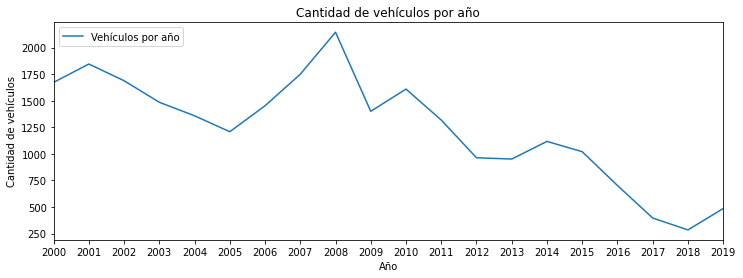

In [149]:
fig, ax = plt.subplots(figsize=(12, 4)) 
ax.plot(autos_por_año_2.index, autos_por_año_2.values, label='Vehículos por año')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad de vehículos')
ax.set_title('Cantidad de vehículos por año')
ax.legend(loc = 'upper left')
plt.xticks(np.arange(min(autos_por_año_2), max(autos_por_año_2)+1)) 
#Viendo la serie de tiempo puedo notar bordes vacíos en los laterales. Los recorto con ax.set_xlim
ax.set_xlim(autos_por_año_2.index[0],autos_por_año_2.index[-1])
#Limito desde donde está el dato 0 de la serie hasta donde está el último (-1)

El año que tiene mayor cantidad de vehículos disponibles en el catálogo es 1998, mientras que para los automóviles del año 2000 en adelante es 2008.

In [150]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [151]:
df_sin_electricos = df[df['engine_type'] != 'electric']
df_sin_electricos['engine_type'].unique()

array(['gasoline', 'diesel'], dtype=object)

##**Gráfico 4**: Cantidad de vehículos por precio, separados por transmisión y tipo de combustible.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


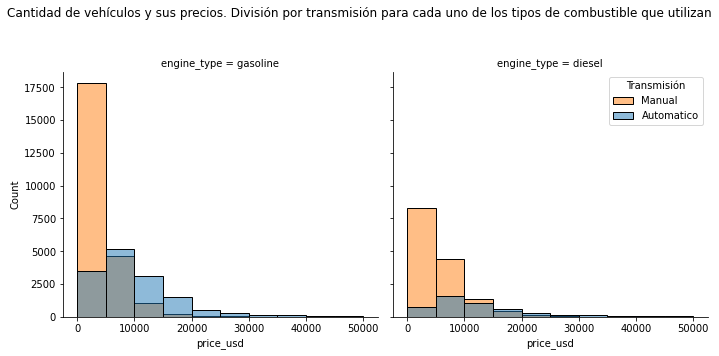

In [152]:
grafico = sns.displot(data=df_sin_electricos, x="price_usd", hue="transmission", col = 'engine_type',legend = False,weights=1.5)

grafico.fig.subplots_adjust(top=.8)

grafico.fig.suptitle('Cantidad de vehículos y sus precios. División por transmisión para cada uno de los tipos de combustible que utilizan')

plt.legend(title='Transmisión', loc='upper right', labels=['Manual', 'Automatico'])

En esta gráfica se analiza la cantidad de vehículos disponibles en el catálogo y la cantidad de los mismos en base a su precio. Se ha dividido además la gráfica a la mitad, dejando por la izquierda a los vehículos que utilizan gasolina y a la izquierda los que usan diesel. Se ha eliminado a los vehículos eléctricos debido a su baja cantidad en comparación a los demás. Además, dentro de cada histograma se divide a los automóviles según su transmisión (naranja: manuales, azul: automáticos).

Puede verse como la mayoría de los vehículos, tanto para ambas transmisiones como tipo de combustible se encuentran en precios menores a los 10.000 USD, disminuyendo su cantidad notablemente después de este precio.

Además, es posible observar como, aproximadamente a partir de los 5.000 USD, para los vehículos que utilizan gasolina, como la cantidad de automáticos es mayor a la de automóviles manuales, siendo esto algo que no se repite en casi ninguna de las otras situaciones.

In [153]:
autos_dias = df['duration_listed'].value_counts()
autos_dias = autos_dias.sort_index()
autos_dias

0       258
1       653
2       642
3       553
4       473
       ... 
2056      1
2079      1
2175      1
2189      1
2232      1
Name: duration_listed, Length: 786, dtype: int64

##**Gráfico 5**: Cantidad de vehículos en el catálogo según la cantidad de días que permanecen en él.

[Text(0, 0.5, 'Cantidad de vehículos'),
 Text(0.5, 0, 'Días'),
 Text(0.5, 1.0, 'Cantidad de vehículos según sus días en el catálogo')]

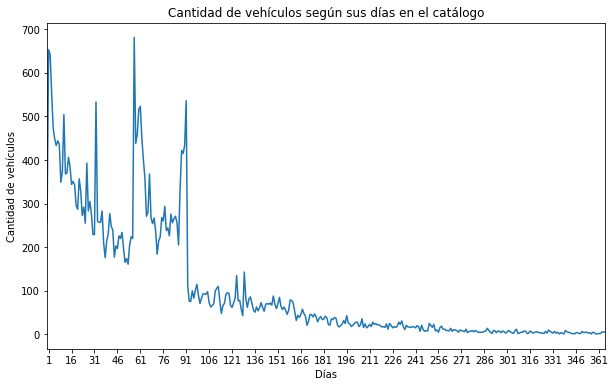

In [154]:
plt.figure(figsize = (10,6))
grafico = sns.lineplot(data=autos_dias, x=autos_dias.index, y=autos_dias.values).set(title = 'Cantidad de vehículos según sus días en el catálogo',xlabel = 'Días', ylabel = 'Cantidad de vehículos')
plt.xticks(np.arange(min(autos_dias), max(autos_dias)+1, 15))
plt.xlim(0,365)
grafico

Este gráfico muestra la cantidad de vehículos disponibles en base a la cantidad de días que llevan en el catálogo (limitado a los automóviles que están en el catálogo desde hace menos de 1 año, siendo estos la gran mayoría). 

Puede verse como una gran cantidad de vehículos fue incorporada en el día en el que se tomó la base de datos (día 0).

Además, existe una gran cantidad de automóviles que se encuentran en los periodos cercanos a los finales de los 3 primeros meses, es decir, automóviles que llevan 30, 60 y 90 días en el catálogo.

Por otro lado, es posible observar como la cantidad desminuye luego de los 3 meses, indicando que este período de tiempo puede ser un tiempo convencional desde que el automóvil se compra hasta que se vende.

In [155]:
autos_colores = df['color'].value_counts()
autos_colores = autos_colores.sort_index()
autos_colores

black     7705
blue      5802
brown      886
green     2760
grey      3751
orange     184
other     2688
red       2925
silver    6852
violet     463
white     4212
yellow     303
Name: color, dtype: int64

In [156]:
colores = pd.DataFrame(autos_colores)
colores['Cantidad'] = colores['color']
colores['color'] = colores.index
colores.index = np.arange(12)
colores


,color,Cantidad
0,black,7705
1,blue,5802
2,brown,886
3,green,2760
4,grey,3751
5,orange,184
6,other,2688
7,red,2925
8,silver,6852
9,violet,463


##**Gráfico 6**: Cantidad de vehículos por color

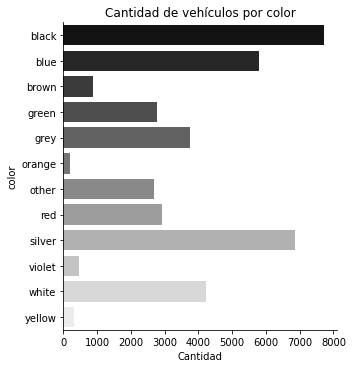

In [157]:
grafico = sns.catplot(x = "Cantidad",y ='color',palette = 'gray',data = colores,kind = "bar",orient='h').set(title = 'Cantidad de vehículos por color')

En el gráfico de barras esquematizado anteriormente se muestra la cantidad de vehículos por color. Puede verse como los colores que mayor predominancia tienen son el negro, el plateado y el azul.

#Modelos de Machine Learning:

##Regresión Lineal (Variables numéricas)

Voy a intentar predecir el precio en base al año de fabricación del vehículo y al kilometraje del mismo

In [158]:
#Primero tengo que seleccionar las variables que quiero utilizar y cuál es la que quiero predecir.

X1 = df[['year_produced','odometer_value']]

y1 = df.price_usd

from sklearn.model_selection import train_test_split
#Defino mis 4 conjuntos:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .2, random_state =1)

X1_train

,year_produced,odometer_value
21590,2003,240000
26715,2013,90000
13508,2009,221000
5849,1993,360000
11121,2008,260000
...,...,...
7813,2000,190800
32511,2017,23000
5192,2003,296000
12172,1996,400000


In [159]:
X1_test

,year_produced,odometer_value
31646,2006,700000
1228,2012,85000
16633,1994,289706
36885,2014,91000
3832,1999,300000
...,...,...
2659,2009,120000
35612,2009,292000
13491,1999,160000
11249,2000,11


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Defino el modelo
lr1 = LinearRegression()

#Ajusto en donde voy a entrenar mi algoritmo
lr1.fit(X1_train,y1_train)

#Ahora tengo que hacer las predicciones (usando el método predict sobre el conjunto de prueba de mi modelo)
y1_pred = lr1.predict(X1_test)

#Para ver los resultados de mi modelo y que tan bueno es uso las métricas de evaluación (acá es fundamental entender que estoy comparando los valores de la variable y en el test
#frente a los valores de y entregados por la predicción)
print('R2: ',r2_score(y1_test,y1_pred))
print('MAE: ',mean_absolute_error(y1_test,y1_pred))
print('MSE: ',mean_squared_error(y1_test,y1_pred))
print('RMSE: ',mean_squared_error(y1_test,y1_pred)**(1/2))


R2:  0.49371077336748437
MAE:  2957.473686443243
MSE:  20343353.297114097
RMSE:  4510.360661534075


Ahora voy a ver qué pasa si considero el año y la marca del automóvil (para eso necesito hacer label encoding sobre las marcas para transformarlas a números y poder así usarlas en el modelo)

In [161]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [162]:
df['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [163]:
df['manufacturer_name_label'] = lbl_encode.fit_transform(df['manufacturer_name'])

In [164]:
df['manufacturer_name_label'].value_counts()

48    4243
35    2759
3     2610
14    2566
39    2493
2     2468
31    2237
36    1909
9     1562
34    1361
30    1328
47    1246
18    1116
43    1089
23     912
33     887
13     824
17     797
49     721
50     481
7      436
8      410
42     303
12     297
45     291
40     235
46     234
11     221
27     213
1      207
51     200
26     184
19     162
24     146
20     139
41     108
22     107
25      92
44      79
54      74
15      71
32      68
0       66
38      61
10      59
6       58
53      55
21      53
4       47
28      47
5       43
37      42
52      42
29      36
16      36
Name: manufacturer_name_label, dtype: int64

In [165]:
df['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [166]:
#Primero tengo que seleccionar las variables que quiero utilizar y cuál es la que quiero predecir.

X2 = df[['year_produced','manufacturer_name_label']]

y2 = df.price_usd

from sklearn.model_selection import train_test_split
#Defino mis 4 conjuntos:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state =1)

X2_train

,year_produced,manufacturer_name_label
21590,2003,2
26715,2013,34
13508,2009,39
5849,1993,33
11121,2008,14
...,...,...
7813,2000,44
32511,2017,43
5192,2003,33
12172,1996,39


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Defino el modelo
lr2 = LinearRegression()

#Ajusto en donde voy a entrenar mi algoritmo
lr2.fit(X2_train,y2_train)

#Ahora tengo que hacer las predicciones (usando el método predict sobre el conjunto de prueba de mi modelo)
y2_pred = lr2.predict(X2_test)

#Para ver los resultados de mi modelo y que tan bueno es uso las métricas de evaluación (acá es fundamental entender que estoy comparando los valores de la variable y en el test
#frente a los valores de y entregados por la predicción)
print('R2: ',r2_score(y2_test,y2_pred))
print('MAE: ',mean_absolute_error(y2_test,y2_pred))
print('MSE: ',mean_squared_error(y2_test,y2_pred))
print('RMSE: ',mean_squared_error(y2_test,y2_pred)**(1/2))

R2:  0.48519233535227035
MAE:  2943.31962463361
MSE:  20685635.109499667
RMSE:  4548.146337740208


Por el momento veo que los resultados en estos dos primeros análisis son similares y no muy buenos, principalmente en su R2

Habiendo explorado los datos anteriormente puedo realizar algunos filtros sobre las distintas variables y observar si las métricas estudiadas mejoran.

In [168]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_label
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249,27.679661
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569,15.898867
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000,14.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000,31.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000,39.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000,54.000000


In [169]:
df_filtrado = df[df['year_produced'] >= 1985]
df_filtrado = df_filtrado[df_filtrado['price_usd'] > 1000]
df_filtrado = df_filtrado[df_filtrado['price_usd'] < 18000]
df_filtrado = df_filtrado[df_filtrado['odometer_value'] < 570000]
df_filtrado.shape

(31764, 31)

Pase de 38531 a 31674 datos (elimine muchos, algo que no es siempre recomendable)

In [170]:
X3 = df_filtrado[['year_produced','odometer_value','number_of_photos']]

y3 = df_filtrado.price_usd

from sklearn.model_selection import train_test_split
#Defino mis 4 conjuntos:

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .2, random_state =1)

X3_train

,year_produced,odometer_value,number_of_photos
8786,2000,240000,7
21767,1995,380000,6
9913,1997,330000,7
16027,2016,74000,11
6918,2007,197000,13
...,...,...,...
21104,2013,118000,13
6086,2002,360000,10
14990,1996,430000,6
255,2006,172000,6


In [171]:
X3_train

,year_produced,odometer_value,number_of_photos
8786,2000,240000,7
21767,1995,380000,6
9913,1997,330000,7
16027,2016,74000,11
6918,2007,197000,13
...,...,...,...
21104,2013,118000,13
6086,2002,360000,10
14990,1996,430000,6
255,2006,172000,6


In [172]:
#Defino el modelo
lr3 = LinearRegression()

#Ajusto en donde voy a entrenar mi algoritmo
lr3.fit(X3_train,y3_train)

#Ahora tengo que hacer las predicciones (usando el método predict sobre el conjunto de prueba de mi modelo)
y3_pred = lr3.predict(X3_test)

#Para ver los resultados de mi modelo y que tan bueno es uso las métricas de evaluación (acá es fundamental entender que estoy comparando los valores de la variable y en el test
#frente a los valores de y entregados por la predicción)
print('R2: ',r2_score(y3_test,y3_pred))
print('MAE: ',mean_absolute_error(y3_test,y3_pred))
print('MSE: ',mean_squared_error(y3_test,y3_pred))
print('RMSE: ',mean_squared_error(y3_test,y3_pred)**(1/2))

R2:  0.6056966855050053
MAE:  1978.105267780304
MSE:  6669255.726317495
RMSE:  2582.490218048753


###Conclusión:

Veo que las métricas mejoraron bastante (a priori R2 mejoró más de un 10%), aunque se puede seguir mejorando. (Aquí además se agregó la cantidad de fotos tomadas a los vehículos)

(Anteriormente eran: 

R2:  0.49371077336748437

MAE:  2957.473686443243

MSE:  20343353.297114097

RMSE:  4510.360661534075)

Se debe contemplar que el R2 o coeficiente de determinación me indica la relación o impacto que tienen unas variables indapendientes sobre otras. Podría seguir intentándose la mejora en estos parámetros mediante el filtrado de la base de datos, pero esto no es lo mejor, ya que se busca eliminar la menor cantidad de información posible.

MAE: Error absoluto promedio de los errores. Me habla de la diferencia o distancia entre los valores reales de y, o de la variable a predecir, y de la entregada por el método. A medida que trabajo en mi modelo busco que este sea lo menor posible (un error de 0 me diría que el modelo coloca a los valores de y exactamente donde se ubican, y por lo tanto tendría un modelo perfecto).

Además, el MAE se encuentra en la misma escala que la variable a predecir, por lo que esto indicaría que el modelo puede tener en promedio un error de 1978 USD sobre el precio de los vehículos (contemplando únicamente año, kilometraje y cantidad de fotografías tomadas).

MSE: MSE es el promedio de los errores al cuadrado, y en lugar de tomar el valor absoluto usa el cuadrado. Aquí los errores grandes se 'magnificarán', pero en definitiva sirve como alarma para notificar que presento valores con errores suficientemente significativos. Con esta métrica ya no me encuentro en la misma escala que la variable a predecir debido al cuadrado aplicado.

RMSE: El RMSE se usa para contrarrestar el efecto del cuadrado del MSE, pero se sigue teniendo en cierta forma el impacto de los datos con grandes errores.

La gran utilidad de estas 3 últimas métricas se da a la hora de comparar el desempeño de diferentes modelos, de donde se puede ver que el último análisis realizado, habiendo quitado algunos datos, es el mejor.

A futuro, cuando se conozcan nuevos métodos de regresión, podría evaluarse si alguno adapta mejor a los datos que una regresión lineal. 

##Clasificación (Variables categóricas)

##Regresión Logística:

In [173]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_name_label
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,45
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,45
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,45
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,86,45
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,True,True,False,False,False,False,True,7,45


In [174]:
df.dtypes

manufacturer_name           object
model_name                  object
transmission                object
color                       object
odometer_value               int64
year_produced                int64
engine_fuel                 object
engine_has_gas                bool
engine_type                 object
engine_capacity            float64
body_type                   object
has_warranty                  bool
state                       object
drivetrain                  object
price_usd                  float64
is_exchangeable               bool
location_region             object
number_of_photos             int64
up_counter                   int64
feature_0                     bool
feature_1                     bool
feature_2                     bool
feature_3                     bool
feature_4                     bool
feature_5                     bool
feature_6                     bool
feature_7                     bool
feature_8                     bool
feature_9           

In [175]:
#Train-test Split
#Creo mis variables para predecir mi performance
Xa = df[['manufacturer_name_label','year_produced','number_of_photos','odometer_value']]

#Esta es mi variable que quiero predecir
ya = df.transmission

from sklearn.model_selection import train_test_split

#Tengo que definir 4 conjuntos:

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = .2, random_state =1)

#A este método le paso primero mi X con las variables, mi variable y que quiero predecir, mi proporción del test respecto del total, radom_state para asegurarme
#Que puedo replicar este proceso aleatorio cuando vuelva a poner las mismas variables

Xa_train

,manufacturer_name_label,year_produced,number_of_photos,odometer_value
21590,2,2003,5,240000
26715,34,2013,10,90000
13508,39,2009,10,221000
5849,33,1993,13,360000
11121,14,2008,9,260000
...,...,...,...,...
7813,44,2000,7,190800
32511,43,2017,18,23000
5192,33,2003,10,296000
12172,39,1996,6,400000


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Tengo que definir el modelo antes de realizar el ajuste

logra = LogisticRegression()

#Ajuste en donde voy a entrenar mi algoritmo (xtrain e ytrain)
logra.fit(Xa_train, ya_train)

#Ahora tengo que hacer las predicciones (llamando al modelo usando el método predict sobre el conjunto de prueba)
ya_pred = logra.predict(Xa_test)

#Para ver que tan bien está el modelo uso las métricas de evaluación
print('Accuracy: ', accuracy_score(ya_test,ya_pred))
print()
print('Confusion_matrix: ')
print(confusion_matrix(ya_test,ya_pred))
print()
print('Classifitacion: ')
print(classification_report(ya_test,ya_pred))

Accuracy:  0.6949526404567277

Confusion_matrix: 
[[ 717 1877]
 [ 474 4639]]

Classifitacion: 
              precision    recall  f1-score   support

   automatic       0.60      0.28      0.38      2594
  mechanical       0.71      0.91      0.80      5113

    accuracy                           0.69      7707
   macro avg       0.66      0.59      0.59      7707
weighted avg       0.67      0.69      0.66      7707



In [177]:
ya_test.value_counts()

mechanical    5113
automatic     2594
Name: transmission, dtype: int64

##KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Tengo que definir el modelo antes de realizar el ajuste

knn = KNeighborsClassifier(n_neighbors = 20) #Le defino el nro de vecinos (despues veo como lo optimizo)

#Ajuste en donde voy a entrenar mi algoritmo (xtrain e ytrain)
knn.fit(Xa_train, ya_train)

#Ahora tengo que hacer las predicciones (llamando al modelo usando el método predict sobre el conjunto de prueba)
ya_pred = knn.predict(Xa_test)

#Para ver que tan bien está el modelo uso las métricas de evaluación
print('Accuracy: ', accuracy_score(ya_test,ya_pred))
print()
print('Confusion_matrix:')
print(confusion_matrix(ya_test,ya_pred))
print()
print('Classifitacion: ')
print(classification_report(ya_test,ya_pred))

Accuracy:  0.7006617360840794

Confusion_matrix:
[[1133 1461]
 [ 846 4267]]

Classifitacion: 
              precision    recall  f1-score   support

   automatic       0.57      0.44      0.50      2594
  mechanical       0.74      0.83      0.79      5113

    accuracy                           0.70      7707
   macro avg       0.66      0.64      0.64      7707
weighted avg       0.69      0.70      0.69      7707



###Conclusión:

Aquí en lugar de querer predecir una variable numérica como el precio se busca determinar si, considerando algunos parámetros (en este caso la marca del vehículo, el año de fabricación, la cantidad de fotografías que se le tomó y el kilometraje), es posible determinar si un auto posee transmisión automática o manual.

Para esto se utilizaron dos modelos de clasificación, siendo estos la regresión logística y el KNN (o vecinos más cercanos).

La métrica estudiada en clase para este tipo de modelos es el accuracy, encargado de medir el porcentaje de aciertos en las predicciones realizadas. Para ambos estudios se calculó esta métrica, obteniendo resultados levemente mejores con el KNN (70% contra 69% aproximadamente), lo que indicaría que 7 de cada 10 vehículos analizados se clasifican correctamente como automáticos o manuales, mientras que el otro 30% se equivoca.

Una herramienta de gran utilidad es la matriz de confusión, la cual muetra la cantidad de aciertos y errores para cada categoría. Los resultados fueron: 

KNN:
1. 1133 Automáticos clasificados como automático
2. 1461 Automáticos clasificados como manual
3. 4267 Manuales clasificados como manual
4. 846 Manuales clasificados como automático

Regresión Logística:
1. 717 Automáticos clasificados como automático
2. 1877 Automáticos clasificados como manual
3. 4639 Manuales clasificados como manual
4. 474 Manuales clasificados como automático

De esto se desprende que el algoritmo parece clasificar en la mayoría de las veces como manual (viendo muchos vehículos automáticos definidos de forma errónea, además de buenos números de acierto en los autos manuales), por lo que debería revisarse con mayor detalle esta clasificación

